# Assignment 2

- Train a linear regression model that maps features to expert scores based on the dataset
- Try different variants using, e.g., feature selection, combined features, removal of outlier and leverage data points, apply symmetry constraints, weighted linear regression
- Assess the accuracy of the models and select a champion variant

## Imports

In [13]:
import sys

sys.path.append("../../scripts")

import dagshub
import mlflow
import ML_utils as MLUtils

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

## Setup

In [14]:
# Setup dagshub and MLFlow
dagshub.init(repo_owner="SamuelFredricBerg", repo_name="4dt907", mlflow=True)
utils = MLUtils.MLUtils("Project_Model_A2_V2")

# Configs
config = {
    "data_split_seed": 42,
    "test_size": 0.2,
    "n_folds": 10,
    "shuffle": True,
    "variant": "Remove outliers/Removing dupes",
    "threshold_multiplier": 3,
}

data_path = "../../data/AimoScore_WeakLink_big_scores_A2.csv"

df = pd.read_csv(data_path, index_col=0)

kf = KFold(
    n_splits=config["n_folds"],
    shuffle=config["shuffle"],
    random_state=config["data_split_seed"],
)

Initialized MLflow to track repo "SamuelFredricBerg/4dt907"

Repository SamuelFredricBerg/4dt907 initialized!

# Preprocessing

In [15]:
def preprocessing(df):
    df_cleaned = df.drop("EstimatedScore", axis=1)
    df_cleaned = df_cleaned.drop_duplicates()
    return df_cleaned

In [16]:
def remove_outliers_cooks(X, y):
    X_const = sm.add_constant(X)
    influence = sm.OLS(y, X_const).fit().get_influence()
    cooks_d = influence.cooks_distance[0]
    threshold = config["threshold_multiplier"] / len(X)
    mask = cooks_d < threshold
    return mask

# Training

In [17]:
def fitReg(X, y):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=config["test_size"], random_state=config["data_split_seed"]
    )

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    return model, y_pred, y_test

## Main Code

Number of columns: 40
Columns names: ['No_1_Angle_Deviation', 'No_2_Angle_Deviation', 'No_3_Angle_Deviation', 'No_4_Angle_Deviation', 'No_5_Angle_Deviation', 'No_6_Angle_Deviation', 'No_7_Angle_Deviation', 'No_8_Angle_Deviation', 'No_9_Angle_Deviation', 'No_10_Angle_Deviation', 'No_11_Angle_Deviation', 'No_12_Angle_Deviation', 'No_13_Angle_Deviation', 'No_1_NASM_Deviation', 'No_2_NASM_Deviation', 'No_3_NASM_Deviation', 'No_4_NASM_Deviation', 'No_5_NASM_Deviation', 'No_6_NASM_Deviation', 'No_7_NASM_Deviation', 'No_8_NASM_Deviation', 'No_9_NASM_Deviation', 'No_10_NASM_Deviation', 'No_11_NASM_Deviation', 'No_12_NASM_Deviation', 'No_13_NASM_Deviation', 'No_14_NASM_Deviation', 'No_15_NASM_Deviation', 'No_16_NASM_Deviation', 'No_17_NASM_Deviation', 'No_18_NASM_Deviation', 'No_19_NASM_Deviation', 'No_20_NASM_Deviation', 'No_21_NASM_Deviation', 'No_22_NASM_Deviation', 'No_23_NASM_Deviation', 'No_24_NASM_Deviation', 'No_25_NASM_Deviation', 'No_1_Time_Deviation', 'No_2_Time_Deviation']


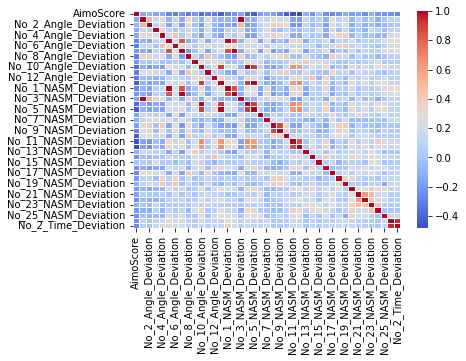

Total columns in merged data: 41
Columns used as predictors: 38
Excluded columns: {'AimoScore', 'No_1_Time_Deviation', 'No_2_Time_Deviation'}
{'R2_Mean': 0.6885971672013073, 'R2_Std': 0.025071154708584405, 'MAE_Mean': 0.0963572882021663, 'MAE_Std': 0.0054287446764064344, 'MSE_Mean': 0.014862773887060473, 'MSE_Std': 0.0014154012167280948}
New Best! 0.6885971672013073 > -1. Updating models on DagsHub


2026/02/14 16:11:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/14 16:11:43 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /var/folders/9w/6516vw7x2gbc3llv8dbzm6vw0000gn/T/tmp827te67l/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.6.1', 'cloudpickle==2.0.0']. Set logging level to DEBUG to see the full traceback. 
2026/02/14 16:11:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Project_Model_A2_V2' already exists. Creating a new version of this model...
2026/02/14 16:11:49 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Project_Model_A2_V2, version 2
Created version '2' of model 'Project_Model_A2_V2'.
/var/folders/9w/6516vw7x2

New model beat current @dev uploading to DagsHub
🏃 View run A2-Training-Outlier at: https://dagshub.com/SamuelFredricBerg/4dt907.mlflow/#/experiments/0/runs/a38219c38be148c49e1a3e52c1cb5675
🧪 View experiment at: https://dagshub.com/SamuelFredricBerg/4dt907.mlflow/#/experiments/0


In [18]:
df_cleaned = preprocessing(df)

df_names = df_cleaned.columns.tolist()
df_cleaned = df_cleaned.reset_index()
print(f"Number of columns: {len(df_names)}")
print(f"Columns names: {df_names}")

df_cleaned.describe()

sns.heatmap(df_cleaned.corr(), annot=False, cmap="coolwarm", fmt=".1f", linewidths=0.5)
plt.show()

with mlflow.start_run(run_name="A2-Training-Outlier") as run:
    mlflow.log_params(config)

    y = df_cleaned["AimoScore"]
    X = df_cleaned.drop(
        ["AimoScore", "No_1_Time_Deviation", "No_2_Time_Deviation", "EstimatedScore"],
        axis=1,
        errors="ignore",
    )

    mask = remove_outliers_cooks(X, y)
    X_clean = X[mask]
    y_clean = y[mask]

    model, y_pred, y_test = fitReg(X_clean, y_clean)

    # 1. R-Squared (The Accuracy)
    # How much of the variance in AimoScore(Expert score) does your model explain?
    r2_scores = cross_val_score(model, X_clean, y_clean, cv=kf, scoring="r2")
    # 2. Mean Absolute Error (MAE)
    # On average, how many points off is your prediction?
    mae_scores = -cross_val_score(
        model, X_clean, y_clean, cv=kf, scoring="neg_mean_absolute_error"
    )
    # 3. Mean Squared Error (MSE)
    mse_scores = -cross_val_score(
        model, X_clean, y_clean, cv=kf, scoring="neg_mean_squared_error"
    )

    print(f"Total columns in merged data: {len(df_cleaned.columns)}")
    print(f"Columns used as predictors: {len(X.columns)}")
    print(f"Excluded columns: {set(df_cleaned.columns) - set(X.columns)}")

    results = {
        "R2_Mean": r2_scores.mean(),
        "R2_Std": r2_scores.std(),
        "MAE_Mean": mae_scores.mean(),
        "MAE_Std": mae_scores.std(),
        "MSE_Mean": mse_scores.mean(),
        "MSE_Std": mse_scores.std(),
    }
    print(results)
    mlflow.log_metrics(results)

    # mlflow.log_artifact("heatmap.png")

    if utils.auto_check_challenger(run.info.run_id, metric_name="R2_Mean"):
        mlflow.sklearn.log_model(model, "model", registered_model_name="Project_Model_A2_V2")
        latest_v = utils.client.get_latest_versions("Project_Model_A2_V2")[0].version
        utils.client.set_registered_model_alias("Project_Model_A2_V2", "dev", latest_v)
        print("New model beat current @dev uploading to DagsHub")
    else:
        print("Did not beat current @dev, model not uploaded to Dagshub")